# 4.2.2
Tabellen nedenfor viser hvor mye elektrisk energi Norge produserte noen utvalgte år.

<table>
    <tr>
        <td>År</td>
        <td>1950</td>
        <td>1960</td>
        <td>1970</td>
        <td>1981</td>
        <td>1990</td>
        <td>2000</td>
        <td>2012</td>
        <td>2020</td>
    </tr>
    <tr>
        <td>Produksjon (GWh)</td>
        <td>16924</td>
        <td>31121</td>
        <td>57606</td>
        <td>93397</td>
        <td>121848</td>
        <td>142816</td>
        <td>147716</td>
        <td>154197</td>
    </tr>
</table>

a) Bruk tallene fra tabellen til å lage en logistisk modell P som viser oss Norges energiproduksjon x år etter 1950.

b) I hvilket år økte produksjonen raskest ifølge modellen P?


Tabellen nedenfor viser forbruket av elektrisk energi i Norge noen utvalgte år.

<table>
    <tr>
        <td>År</td>
        <td>1950</td>
        <td>1960</td>
        <td>1970</td>
        <td>1981</td>
        <td>1990</td>
        <td>2000</td>
        <td>2012</td>
        <td>2020</td>
    </tr>
    <tr>
        <td>Forbruk (GWh)</td>
        <td>16924</td>
        <td>31253</td>
        <td>56770</td>
        <td>88168</td>
        <td>105941</td>
        <td>123761</td>
        <td>129900</td>
        <td>133725</td>
    </tr>
</table>

c) Bruk tallene fra tabellen til å lage en modell F som viser oss Norges energiforbruk x år etter 1950.

d) Vurder om vi på sikt vil være selvforsynte med elektrisk energi.

## a)

P(x) = 157303.07 / (1 + 9.64 * e^-0.0867 * x)


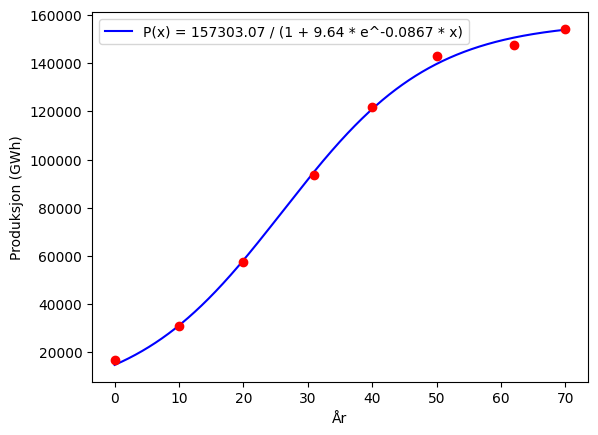

In [88]:
import matplotlib.pyplot as plt
import scipy.optimize as so
import numpy as np

# Table 1
data_x_1 = [1950, 1960, 1970, 1981, 1990, 2000, 2012, 2020]
data_y_1 = [16924, 31121, 57606, 93397, 121848, 142816, 147716, 154197]

for i in range(len(data_x_1)):
    data_x_1[i] = data_x_1[i] - 1950

# Table 2
data_x_2 = [1950, 1960, 1970, 1981, 1990, 2000, 2012, 2020]
data_y_2 = [16924, 31253, 56770, 88168, 105941, 123761, 129900, 133725]

for i in range(len(data_x_2)):
    data_x_2[i] = data_x_2[i] - 1950

def mal_P(x, L, k, a):
    return L / (1 + a * np.exp(-k * (x)))

constants = so.curve_fit(mal_P, data_x_1, data_y_1, [160000, 0.1, 1])[0]
L = constants[0]
k = constants[1]
a = constants[2]

def P(x):
    return L / (1 + a * np.exp(-k * (x))) 

x = min(data_x_1)
x_maks = max(data_x_1)
dx = 0.001

x_list = []
y_list = []

while x < x_maks:
    x_list.append(x)
    y_list.append(P(x))

    x += dx

print(f"P(x) = {round(L, 2)} / (1 + {round(a, 2)} * e^{round(-k, 4)} * x)")
plt.plot(x_list, y_list, "b-", label=f"P(x) = {round(L, 2)} / (1 + {round(a, 2)} * e^{round(-k, 4)} * x)")
plt.plot(data_x_1, data_y_1, "ro")
plt.xlabel("År")
plt.ylabel("Produksjon (GWh)")
plt.legend()
plt.show()

## b)

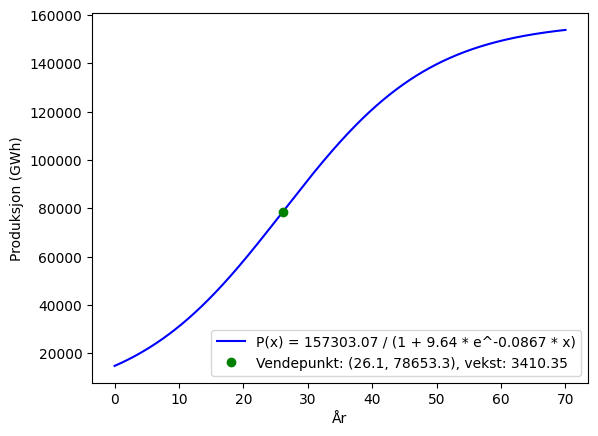

In [89]:
fastest_growth = (0, 0, 0)

for i in range(1, len(x_list)):
    delta_y = y_list[i] - y_list[i - 1]
    if delta_y > fastest_growth[0]:
        fastest_growth = (delta_y, i, y_list[i])

plt.plot(x_list, y_list, "b-", label=f"P(x) = {round(L, 2)} / (1 + {round(a, 2)} * e^{round(-k, 4)} * x)")
plt.plot(x_list[fastest_growth[1]], fastest_growth[2], "go", label=f"Vendepunkt: ({round(x_list[fastest_growth[1]], 1)}, {round(fastest_growth[2], 2)}), vekst: {round(fastest_growth[0]/dx, 2)}")
plt.xlabel("År")
plt.ylabel("Produksjon (GWh)")
plt.legend()
plt.show()

## c)

F(x) = 136386.59 / (1 + 7.44 * e^-0.0832 * x)


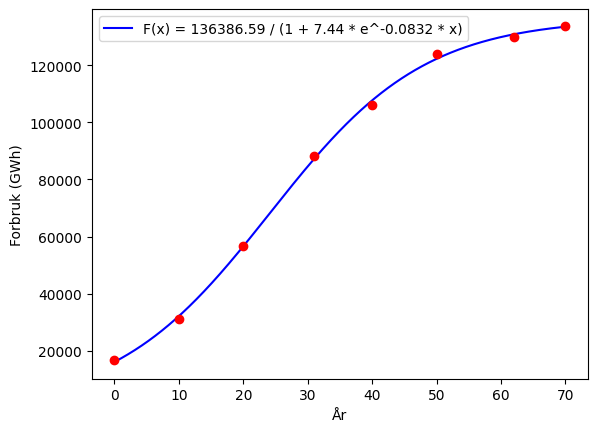

In [90]:
constants = so.curve_fit(mal_P, data_x_2, data_y_2, [140000, 0.1, 1])[0]
L = constants[0]
k = constants[1]
a = constants[2]

def F(x):
    return L / (1 + a * np.exp(-k * (x)))

x = min(data_x_2)
x_maks = max(data_x_2)
dx = 0.001

x_list = []
y_list = []

while x < x_maks:
    x_list.append(x)
    y_list.append(F(x))

    x += dx

print(f"F(x) = {round(L, 2)} / (1 + {round(a, 2)} * e^{round(-k, 4)} * x)")
plt.plot(x_list, y_list, "b-", label=f"F(x) = {round(L, 2)} / (1 + {round(a, 2)} * e^{round(-k, 4)} * x)")
plt.plot(data_x_2, data_y_2, "ro")
plt.xlabel("År")
plt.ylabel("Forbruk (GWh)")
plt.legend()
plt.show()